In [1]:
import os
import sys

In [2]:
from maquinas.contextfree.cfg import ContextFreeGrammar as CFG
from maquinas.parser.earley_parser import print_chart, chart2table

In [3]:
cfg1=CFG("S->ST; S->a; B->epsilon; T->aB; T->a")
s="aa"
roots,chart,forest=cfg1.parse(s)
print(f'Con "{s}" Se acepta?', "Sí" if roots else "No" )

Con "aa" Se acepta? Sí


In [4]:
roots,forest

([S → ST● 0∷2],
 ({'label': ('S', 0, 2),
   'id': 0,
   'partial': False,
   'children': OrderedSet([((S → S●T, 0, 1), ('T', 1, 2))]),
   'tokens': ['a', 'a']},
  OrderedDict([(('S', 0, 2),
                {'label': ('S', 0, 2),
                 'id': 0,
                 'partial': False,
                 'children': OrderedSet([((S → S●T, 0, 1), ('T', 1, 2))]),
                 'tokens': ['a', 'a']}),
               ((S → S●T, 0, 1),
                {'label': (S → S●T, 0, 1),
                 'id': 1,
                 'partial': True,
                 'children': OrderedSet([(('S', 0, 1),)])}),
               (('S', 0, 1),
                {'label': ('S', 0, 1),
                 'id': 2,
                 'partial': False,
                 'children': OrderedSet([(('a', 0, 1),)])}),
               (('a', 0, 1),
                {'label': ('a', 0, 1),
                 'id': 3,
                 'partial': False,
                 'children': OrderedSet()}),
               (('T', 1, 2),
    

In [5]:
cfg1.print_chart(s,chart,pointers=True)

S(0): •aa
  0 | S → ●a               |    0 | 
  1 | S → ●ST              |    0 | 
S(1): a•a
  0 | S → a●               |    0 | 
  1 | S → S●T              |    0 | 0:(S → a● 0∷1,)
  2 | T → ●a               |    1 | 
  3 | T → ●aB              |    1 | 
S(2): aa•
  0 | T → a●B              |    1 | 
  1 | B → ●ε               |    2 | 
  2 | B → ε●               |    2 | 
  3 | T → aB●              |    1 | 2:(B → ε● 2∷2, T → a●B 1∷2)
  4 | S → ST●              |    0 | 1:(T → aB● 1∷2, S → S●T 0∷1), (T → a● 1∷2, S → S●T 0∷1)
  5 | S → S●T              |    0 | 0:(S → ST● 0∷2,)
  6 | T → ●a               |    2 | 
  7 | T → ●aB              |    2 | 
  8 | T → a●               |    1 | 


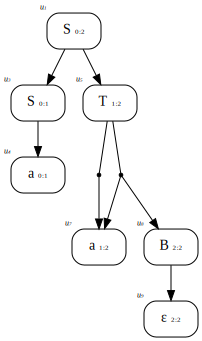

In [6]:
cfg1.graph_forest(forest,span=True,show_id=True,full=False)

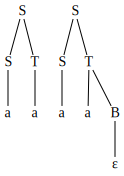

In [7]:
trees=cfg1.extract_trees(forest)
cfg1.graph_trees(trees)

In [8]:
# TODO broken in 0.1.5.3
#cfg1.print_derivations(s)

In [9]:
cfg2=CFG("S->SS; S->b;")
s="bbb"
roots,chart,forest=cfg2.parse(s)
print(f'Con "{s}" Se acepta?', "Sí" if roots else "No" )

Con "bbb" Se acepta? Sí


In [10]:
print_chart(s,chart,pointers=True)

S(0): •bbb
  0 | S → ●b               |    0 | 
  1 | S → ●SS              |    0 | 
S(1): b•bb
  0 | S → b●               |    0 | 
  1 | S → S●S              |    0 | 0:(S → b● 0∷1,)
  2 | S → ●b               |    1 | 
  3 | S → ●SS              |    1 | 
S(2): bb•b
  0 | S → b●               |    1 | 
  1 | S → S●S              |    1 | 1:(S → b● 1∷2,)
  2 | S → ●b               |    2 | 
  3 | S → ●SS              |    2 | 
  4 | S → SS●              |    0 | 1:(S → b● 1∷2, S → S●S 0∷1)
  5 | S → S●S              |    0 | 0:(S → SS● 0∷2,)
S(3): bbb•
  0 | S → b●               |    2 | 
  1 | S → SS●              |    0 | 2:(S → b● 2∷3, S → S●S 0∷2); 1:(S → SS● 1∷3, S → S●S 0∷1)
  2 | S → S●S              |    0 | 0:(S → SS● 0∷3,)
  3 | S → ●b               |    3 | 
  4 | S → ●SS              |    3 | 
  5 | S → S●S              |    2 | 2:(S → b● 2∷3,)
  6 | S → SS●              |    1 | 2:(S → b● 2∷3, S → S●S 1∷2)
  7 | S → S●S              |    1 | 1:(S → SS● 1∷3,)


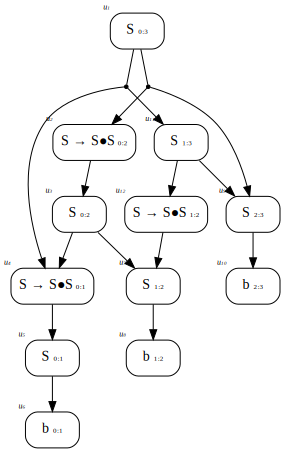

In [15]:
cfg2.graph_forest(forest,span=True,show_id=True)

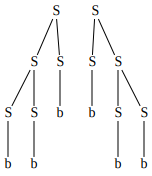

In [16]:
trees=cfg2.extract_trees(forest)
cfg2.graph_trees(trees)

In [19]:
# TODO broken in 0.1.5.3
#cfg2.print_derivations(s)

In [20]:
s="bb"
roots,chart,forest=cfg2.parse(s)
print(f'Con "{s}" Se acepta?', "Sí" if roots else "No" )

Con "bb" Se acepta? Sí


In [21]:
cfg2.print_chart(s,chart,pointers=True)

S(0): •bb
  0 | S → ●b               |    0 | 
  1 | S → ●SS              |    0 | 
S(1): b•b
  0 | S → b●               |    0 | 
  1 | S → S●S              |    0 | 0:(S → b● 0∷1,)
  2 | S → ●b               |    1 | 
  3 | S → ●SS              |    1 | 
S(2): bb•
  0 | S → b●               |    1 | 
  1 | S → S●S              |    1 | 1:(S → b● 1∷2,)
  2 | S → ●b               |    2 | 
  3 | S → ●SS              |    2 | 
  4 | S → SS●              |    0 | 1:(S → b● 1∷2, S → S●S 0∷1)
  5 | S → S●S              |    0 | 0:(S → SS● 0∷2,)


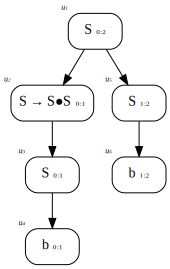

In [22]:
cfg2.graph_forest(forest,span=True,show_id=True)

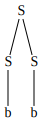

In [23]:
trees=cfg2.extract_trees(forest)
cfg2.graph_trees(trees)

In [25]:
# TODO broken in 0.1.5.3
# cfg2.print_derivations(s)

In [26]:
s="bbbbbbbb"
roots,chart,forest=cfg2.parse(s)
print(f'Con "{s}" Se acepta?', "Sí" if roots else "No" )

Con "bbbbbbbb" Se acepta? Sí


In [27]:
cfg2.print_chart(s,chart,pointers=True)

S(0): •bbbbbbbb
  0 | S → ●b               |    0 | 
  1 | S → ●SS              |    0 | 
S(1): b•bbbbbbb
  0 | S → b●               |    0 | 
  1 | S → S●S              |    0 | 0:(S → b● 0∷1,)
  2 | S → ●b               |    1 | 
  3 | S → ●SS              |    1 | 
S(2): bb•bbbbbb
  0 | S → b●               |    1 | 
  1 | S → S●S              |    1 | 1:(S → b● 1∷2,)
  2 | S → ●b               |    2 | 
  3 | S → ●SS              |    2 | 
  4 | S → SS●              |    0 | 1:(S → b● 1∷2, S → S●S 0∷1)
  5 | S → S●S              |    0 | 0:(S → SS● 0∷2,)
S(3): bbb•bbbbb
  0 | S → b●               |    2 | 
  1 | S → SS●              |    0 | 2:(S → b● 2∷3, S → S●S 0∷2); 1:(S → SS● 1∷3, S → S●S 0∷1)
  2 | S → S●S              |    0 | 0:(S → SS● 0∷3,)
  3 | S → ●b               |    3 | 
  4 | S → ●SS              |    3 | 
  5 | S → S●S              |    2 | 2:(S → b● 2∷3,)
  6 | S → SS●              |    1 | 2:(S → b● 2∷3, S → S●S 1∷2)
  7 | S → S●S              |    1 | 1:(S → SS

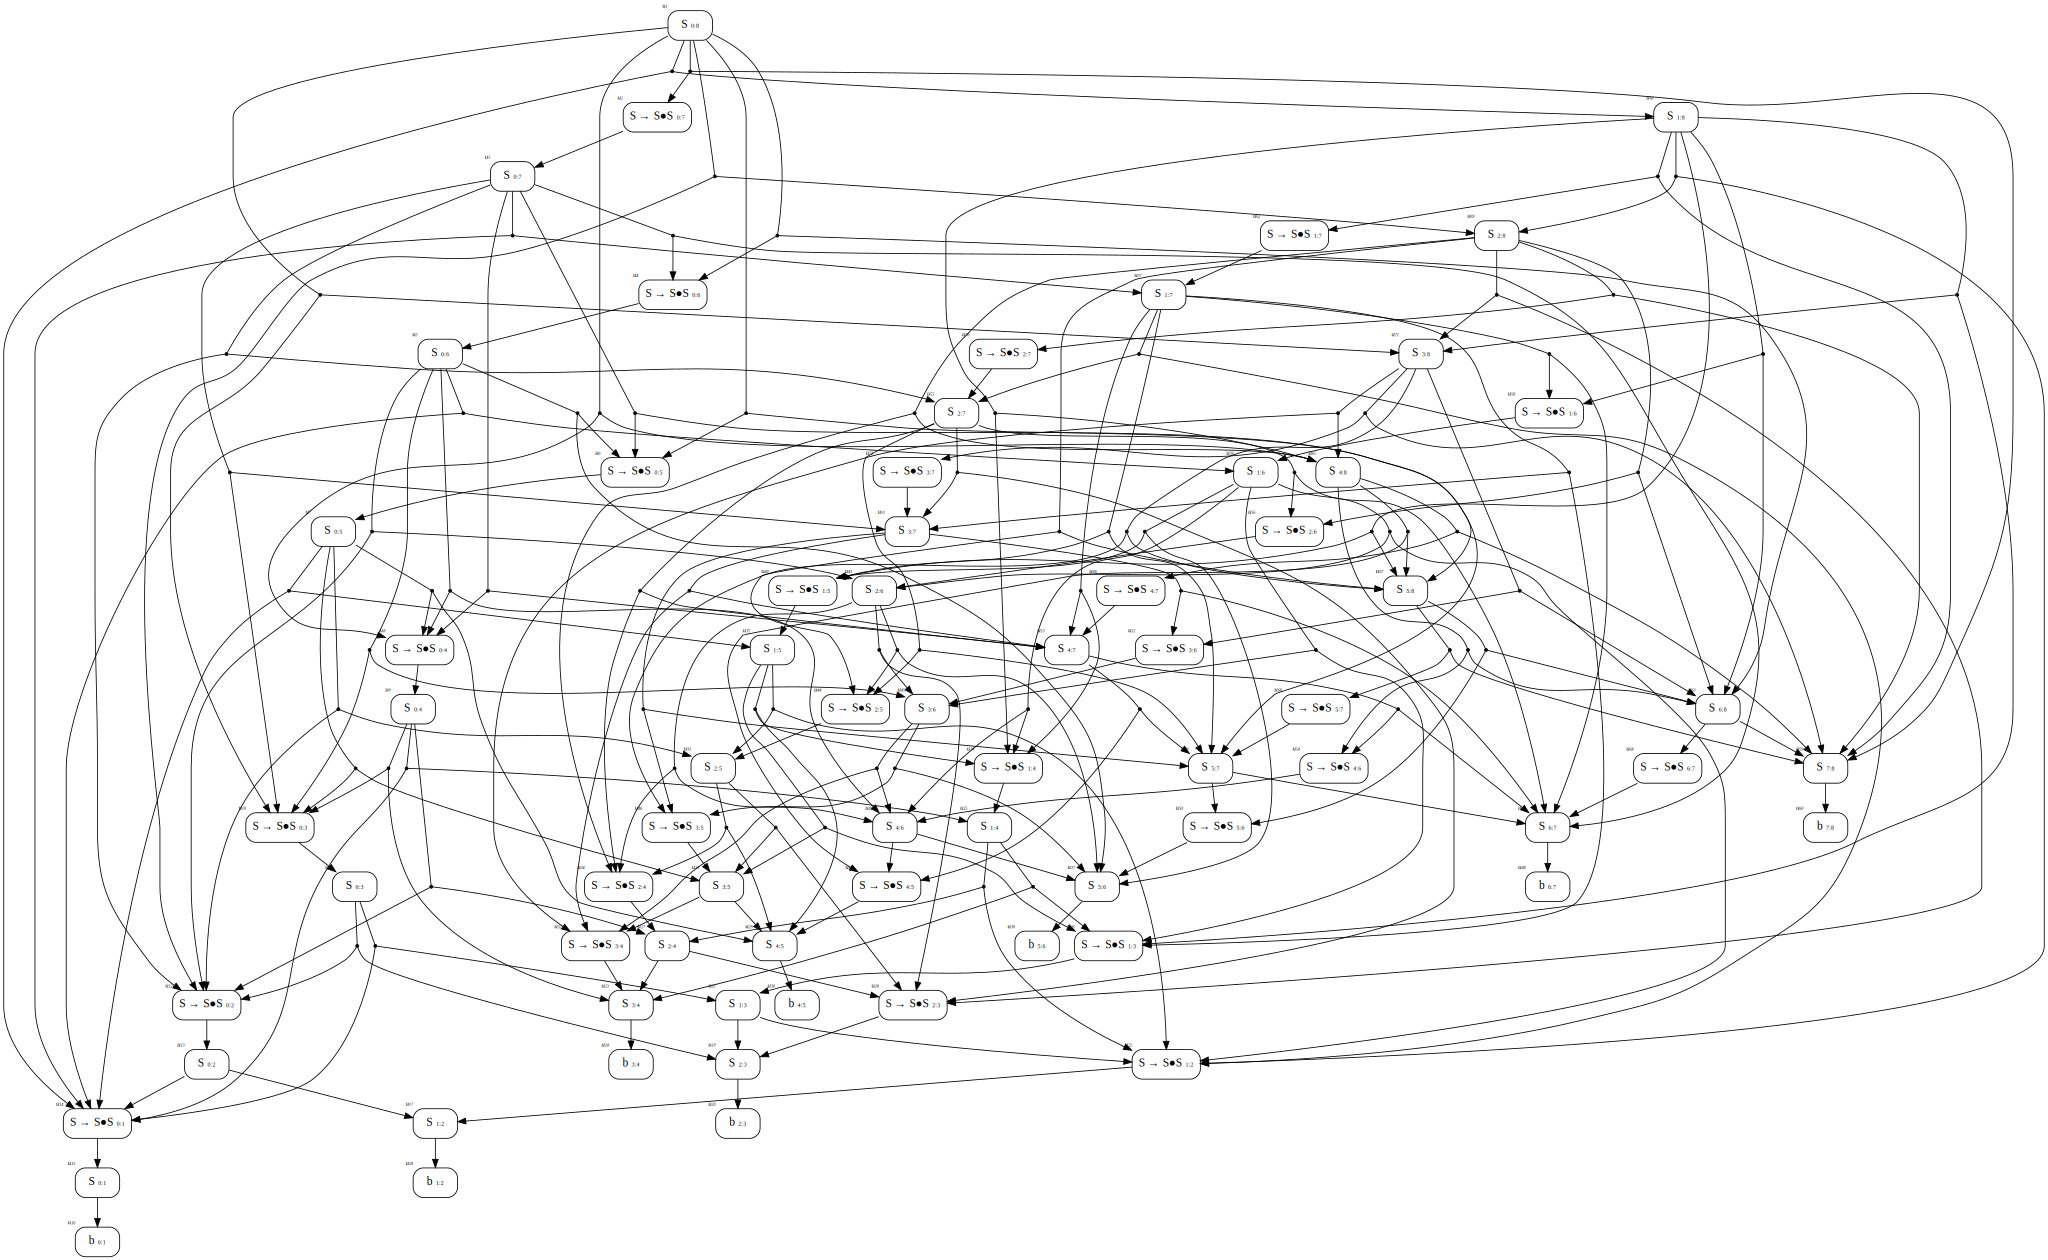

In [28]:
cfg2.graph_forest(forest,span=True,show_id=True)

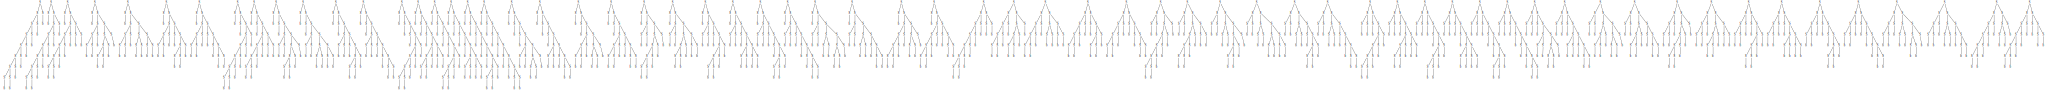

In [31]:
trees=cfg2.extract_trees(forest,max_ancesters=5)
cfg2.graph_trees(trees)

In [32]:
# TODO broken in 0.1.5.3
#cfg2.print_derivations(s,ini=10,fin=20)

In [33]:
cfg3=CFG("S->AT; S-> aT; A->a; A->BA; B-> epsilon; T-> bbb")
s="abbb"
roots,chart,forest=cfg3.parse(s)
print(f'Con "{s}" Se acepta?', "Sí" if roots else "No" )

Con "abbb" Se acepta? Sí


In [34]:
cfg3.print_chart(s,chart,pointers=True)

S(0): •abbb
  0 | S → ●aT              |    0 | 
  1 | S → ●AT              |    0 | 
  2 | A → ●BA              |    0 | 
  3 | B → ●ε               |    0 | 
  4 | B → ε●               |    0 | 
  5 | A → B●A              |    0 | 0:(B → ε● 0∷0,)
  6 | A → ●a               |    0 | 
S(1): a•bbb
  0 | A → a●               |    0 | 
  1 | A → BA●              |    0 | 0:(A → a● 0∷1, A → B●A 0∷0), (A → BA● 0∷1, A → B●A 0∷0)
  2 | S → A●T              |    0 | 0:(A → a● 0∷1,), (A → BA● 0∷1,)
  3 | T → ●bbb             |    1 | 
  4 | S → a●T              |    0 | 
S(2): ab•bb
  0 | T → b●bb             |    1 | 
S(3): abb•b
  0 | T → bb●b             |    1 | 2:(T → b●bb 1∷2,)
S(4): abbb•
  0 | T → bbb●             |    1 | 3:(T → bb●b 1∷3,)
  1 | S → aT●              |    0 | 1:(T → bbb● 1∷4, S → a●T 0∷1)
  2 | S → AT●              |    0 | 1:(T → bbb● 1∷4, S → A●T 0∷1)


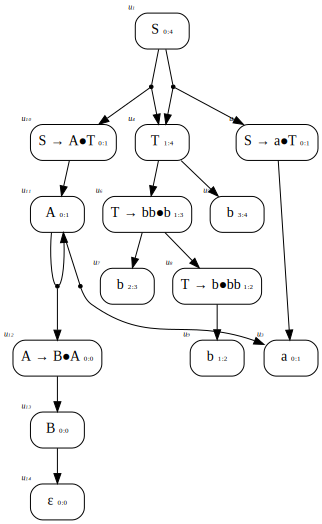

In [35]:
cfg3.graph_forest(forest,span=True,show_id=True)

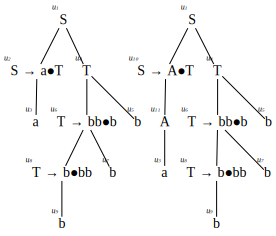

In [44]:
trees=cfg3.extract_trees(forest,max_depth=30)
cfg3.graph_trees(trees,show_id=True,full=True)

In [43]:
# TODO broken in 0.1.5.3
#cfg3.print_derivations(s)